# Pymaceuticals Inc.
---

### Analysis

- After review it appears that Capomulin and Ramicane had the lowest Tumor Volume on average. There were more tests done with them and even with more data on these specific drug Regimens the overall Tumor Volume is lower. The study was done with 51% of male mice and 49% of female mice. We can see that as the weight goes up the average tumor volume follows in a positive linear regression. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


#Combine the data into a single DataFrame
mouse_study_complete_df = pd.merge(study_results, mouse_metadata)

# # Display the data table for preview
mouse_study_complete_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
num_mice = len(mouse_study_complete_df["Mouse ID"].unique())

num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_complete_df[mouse_study_complete_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [104]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_study_df = mouse_study_complete_df[mouse_study_complete_df['Mouse ID'] != 'g989']


cleaned_mouse_study_df.reset_index(inplace=True, drop=True)
cleaned_mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
final_num_mice = len(cleaned_mouse_study_df["Mouse ID"])
print(final_num_mice)


1880


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_mean = cleaned_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summary_median = cleaned_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_variance = cleaned_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_std = cleaned_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_sem = cleaned_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({
                "Mean Tumor Volume" : summary_mean,
                "Median Tumor Volume" : summary_median,
                "Tumor Volume Variance" : summary_variance,
                "Tumor Volume Std. Dev" : summary_std,
                "Tumor Volume Std. Err." : summary_sem
})

display(summary_df)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df2 = pd.DataFrame({
                "mean" : summary_mean,
                "median" : summary_median,
                "var" : summary_variance,
                "std" : summary_std,
                "sem" : summary_sem
})

display(summary_df2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

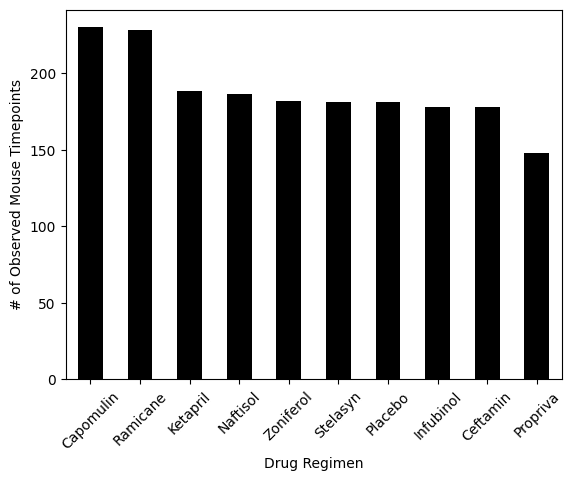

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts_per_regimen = cleaned_mouse_study_df["Drug Regimen"].value_counts()

ax = counts_per_regimen.plot(kind = "bar", color = "black", rot = 45)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Observed Mouse Timepoints")

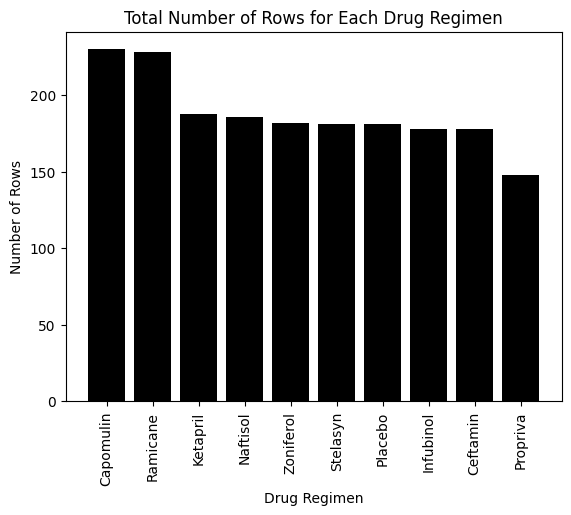

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
names = counts_per_regimen.index
counts = counts_per_regimen.values

plt.bar(names, counts, color = "black")
plt.xticks(rotation = 90)

# # Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.title("Total Number of Rows for Each Drug Regimen")

# Show the plot
plt.show()




Text(0, 0.5, 'Sex')

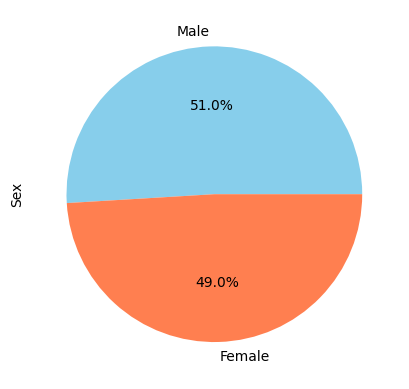

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = cleaned_mouse_study_df["Sex"].value_counts()
sex_distribution

ax = sex_distribution.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'coral'], startangle=0)
ax.set_ylabel("Sex")

Text(0, 0.5, 'Sex')

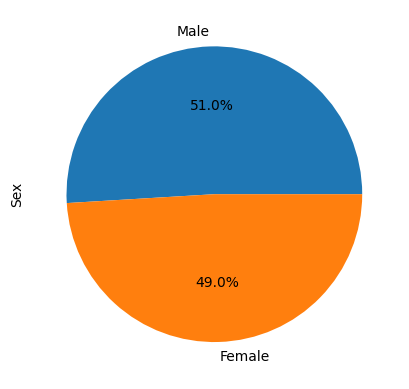

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(sex_distribution, autopct="%1.1f%%", startangle=0, labels = labels)
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [106]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
target_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
selected_mice = cleaned_mouse_study_df[cleaned_mouse_study_df["Drug Regimen"].isin(target_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
final_tumor = selected_mice.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].last()
final_tumor
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
f_tumor_df = pd.merge(final_tumor,cleaned_mouse_study_df)
display(f_tumor_df)

,Tumor Volume (mm3),Mouse ID,Timepoint,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,67.973419,a203,45,2,Infubinol,Female,20,23
1,65.525743,a251,45,1,Infubinol,Female,21,25
2,62.999356,a275,45,3,Ceftamin,Female,20,28
3,38.407618,a411,45,1,Ramicane,Male,3,22
4,43.047543,a444,45,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
1083,68.594745,y769,45,4,Ceftamin,Female,6,27
1084,31.896238,y793,45,2,Capomulin,Male,17,17
1085,64.729837,y865,45,3,Ceftamin,Male,23,26
1086,30.638696,z578,45,0,Ramicane,Male,11,16


In [105]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = cleaned_mouse_study_df.loc[cleaned_mouse_study_df["Drug Regimen"]== treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    
    # Identify potential outliers
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print results
    print(f"{treatment} potential outliers are : {outliers}\n")
    

Capomulin potential outliers are : 1686    25.472143
1687    23.343598
Name: Tumor Volume (mm3), dtype: float64

Ramicane potential outliers are : 514    22.050126
Name: Tumor Volume (mm3), dtype: float64

Infubinol potential outliers are : Series([], Name: Tumor Volume (mm3), dtype: float64)

Ceftamin potential outliers are : Series([], Name: Tumor Volume (mm3), dtype: float64)



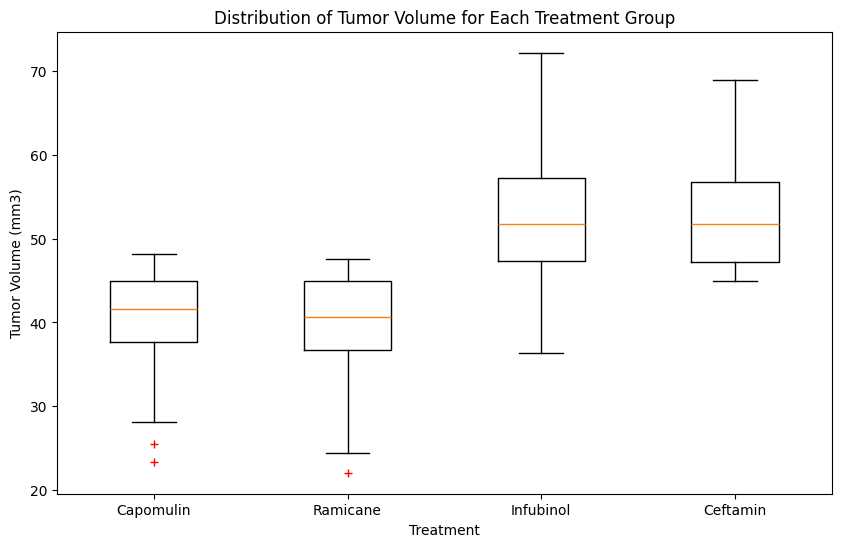

In [145]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments, sym='r+')  
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

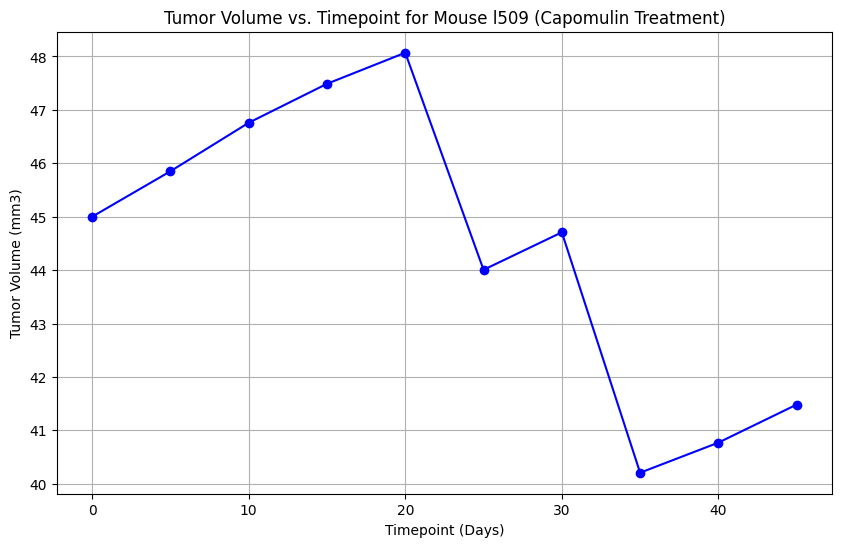

In [143]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import random

# Selecting a random mouse ID treated with Capomulin
capomulin_mice = cleaned_mouse_study_df[cleaned_mouse_study_df["Drug Regimen"] == "Capomulin"]["Mouse ID"].unique()
selected_mouse_id = random.choice(capomulin_mice)

# Selecting data for the randomly chosen mouse treated with Capomulin
mouse_data = cleaned_mouse_study_df[(cleaned_mouse_study_df["Drug Regimen"] == "Capomulin") & (cleaned_mouse_study_df["Mouse ID"] == selected_mouse_id)]

# Generate a line plot
plt.figure(figsize=(10, 6))

# Check if the data is not empty before plotting
if not mouse_data.empty:
    plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o', color='b')
    plt.title(f'Tumor Volume vs. Timepoint for Mouse {selected_mouse_id} (Capomulin Treatment)')
    plt.xlabel('Timepoint (Days)')
    plt.ylabel('Tumor Volume (mm3)')
    plt.grid(True)
    plt.show()
else:
    print("No data found for the specified mouse ID and treatment.")



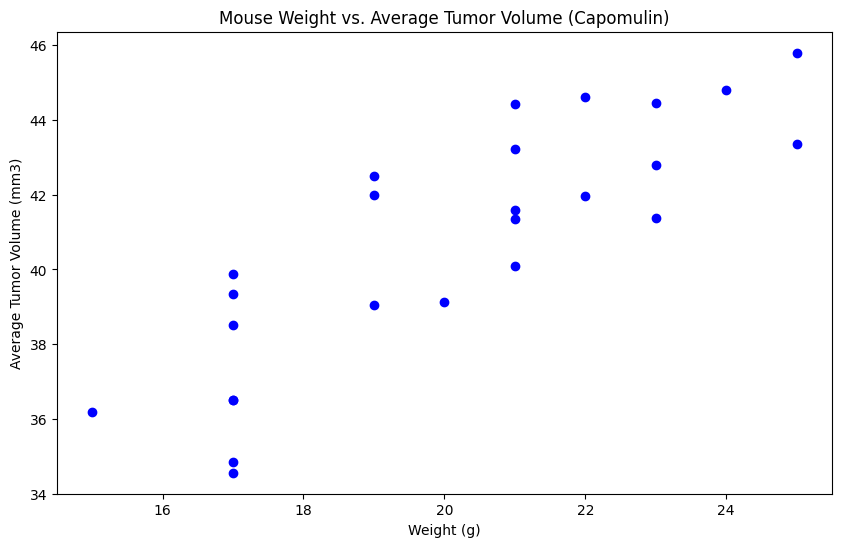

In [111]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg_tumor = cleaned_mouse_study_df[cleaned_mouse_study_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge average tumor volume with mouse weight
capomulin_combined = pd.merge(capomulin_avg_tumor, mouse_metadata, on="Mouse ID")

# Generate a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_combined["Weight (g)"], capomulin_combined["Tumor Volume (mm3)"], color='b')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

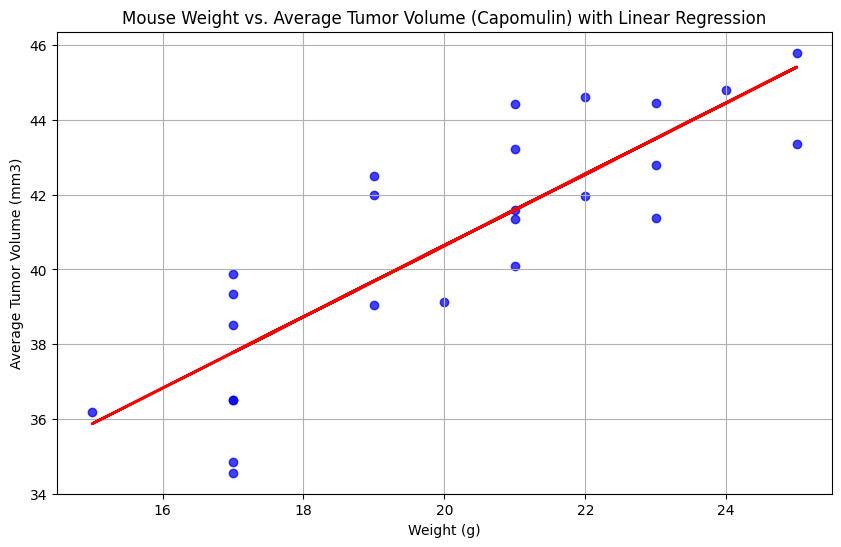

Correlation Coefficient: 0.8419363424694721


In [113]:
# Calculate the correlation coefficient and a linear regression model 

from scipy.stats import linregress
correlation = st.pearsonr(capomulin_combined["Weight (g)"], capomulin_combined["Tumor Volume (mm3)"])[0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_combined["Weight (g)"], capomulin_combined["Tumor Volume (mm3)"])

# Create a linear regression line
regress_line = slope * capomulin_combined["Weight (g)"] + intercept

# Generate the scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_combined["Weight (g)"], capomulin_combined["Tumor Volume (mm3)"], color='b', alpha=0.75)
plt.plot(capomulin_combined["Weight (g)"], regress_line, color='r', linewidth=2)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin) with Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

# Display correlation coefficient
print(f"Correlation Coefficient: {correlation}")